In [14]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('../data/kickstarter_projects.csv')

In [20]:
df.head(10)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State,Duration
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed,39
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed,87
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful,8
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful,79
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed,28
5,2089078683,New York Makes a Book!!,Journalism,Journalism,United States,2009-04-28 13:55:41,2009-05-16,3000,3329,110,Successful,17
6,830477146,Web Site for Short Horror Film,Film & Video,Shorts,United States,2009-04-29 02:04:21,2009-05-29,200,41,3,Failed,29
7,266044220,Help me write my second novel.,Publishing,Fiction,United States,2009-04-29 02:58:50,2009-05-29,500,563,18,Successful,29
8,1502297238,Produce a Play (Canceled),Theater,Theater,United States,2009-04-29 04:37:37,2009-06-01,500,0,0,Canceled,32
9,813230527,Sponsor Dereck Blackburn (Lostwars) Artist in ...,Music,Rock,United States,2009-04-29 05:26:32,2009-05-16,300,15,2,Failed,16


In [11]:
print(f"Shape of dataset: {df.shape}")
df.info()

Shape of dataset: (374853, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [12]:
# Convert data types

# Convert to datetime
df['Launched'] = pd.to_datetime(df['Launched'])
df['Deadline'] = pd.to_datetime(df['Deadline'])

# Create campaign duration in days
df['Duration'] = (df['Deadline'] - df['Launched']).dt.days

In [ ]:
df['State'].value_counts()

State
Failed        197611
Successful    133851
Canceled       38751
Live            2798
Suspended       1842
Name: count, dtype: int64

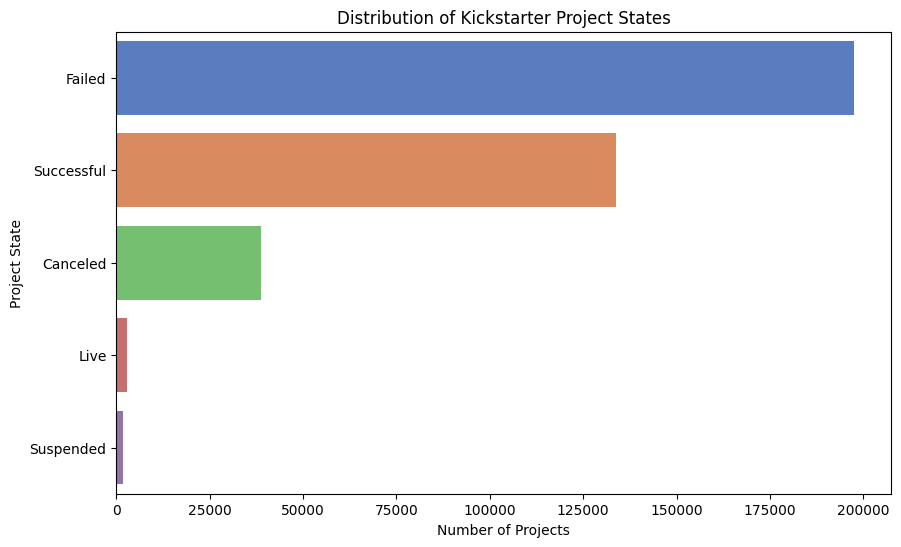

In [16]:
# Count of each project state
state_counts = df['State'].value_counts()

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=state_counts.values, y=state_counts.index, palette='muted')
plt.title('Distribution of Kickstarter Project States')
plt.xlabel('Number of Projects')
plt.ylabel('Project State')
plt.show()


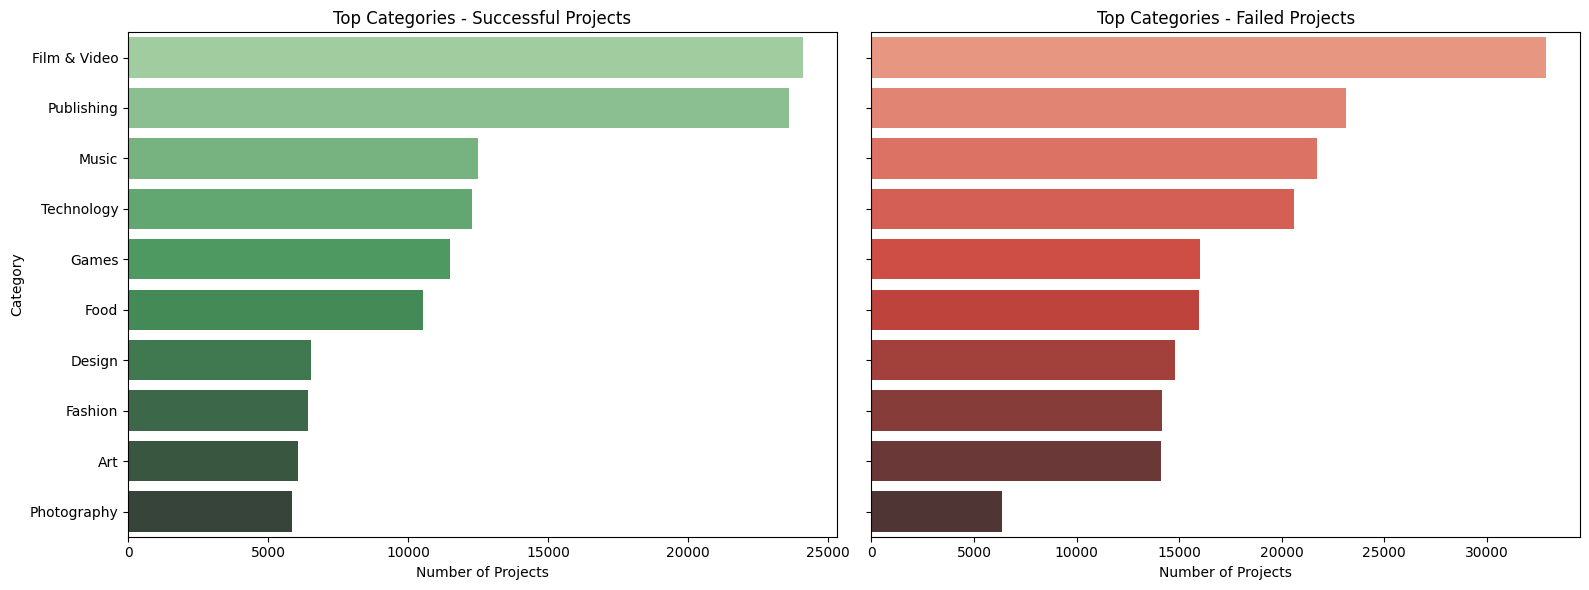

In [17]:
# Plot top categories for successful and failed projects
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Top categories for successful
success = df[df['State'] == 'Successful']['Category'].value_counts().head(10)
sns.barplot(y=success.index, x=success.values, ax=axes[0], palette='Greens_d')
axes[0].set_title('Top Categories - Successful Projects')
axes[0].set_xlabel('Number of Projects')
axes[0].set_ylabel('Category')

# Top categories for failed
failed = df[df['State'] == 'Failed']['Category'].value_counts().head(10)
sns.barplot(y=failed.index, x=failed.values, ax=axes[1], palette='Reds_d')
axes[1].set_title('Top Categories - Failed Projects')
axes[1].set_xlabel('Number of Projects')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()
